In [36]:
from sklearn.datasets import load_boston
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

In [4]:
x, y = load_boston(return_X_y=True)

##The manual way##

In [5]:
kf = KFold(n_splits=5, shuffle=True)

In [46]:
model = LinearRegression()
kfold_metrics = []

for train_idx, test_idx in kf.split(x):
  x_train, y_train = x[train_idx], y[train_idx]
  x_test, y_test = x[test_idx], y[test_idx]
  model.fit(x_train, y_train)
  score = model.score(x_test, y_test)
  kfold_metrics.append(score)

In [10]:
np.array(kfold_metrics).mean()

0.7178279849191976

##The auto way##

In [11]:
from sklearn.model_selection import cross_val_score

In [34]:
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print(scores.mean())

0.35327592439588484


In [37]:
from sklearn.model_selection import cross_validate

In [42]:
model = LinearRegression()
cv = cross_validate(model, x, y, cv=5)
cv['test_score'].mean()

0.35327592439588484

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [49]:
x, y = load_breast_cancer(return_X_y=True)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [64]:
model = LogisticRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
print(model.score(x_test,y_test))

0.9590643274853801


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


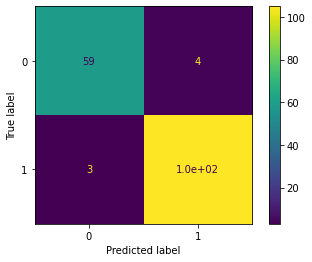

In [66]:
plot_confusion_matrix(model, x_test,y_test)

In [69]:
model = LogisticRegressionCV(cv=5)
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [73]:
model.scores_

{1: array([[0.9625    , 0.9625    , 0.95      , 0.9625    , 0.9625    ,
         0.9625    , 0.9625    , 0.95      , 0.9625    , 0.9625    ],
        [0.925     , 0.9375    , 0.925     , 0.95      , 0.9375    ,
         0.9375    , 0.9375    , 0.9375    , 0.9375    , 0.95      ],
        [0.925     , 0.9375    , 0.95      , 0.9625    , 0.9375    ,
         0.9375    , 0.95      , 0.9625    , 0.95      , 0.9625    ],
        [0.96202532, 0.97468354, 0.97468354, 0.97468354, 0.98734177,
         0.97468354, 0.97468354, 0.97468354, 0.97468354, 0.97468354],
        [0.82278481, 0.84810127, 0.88607595, 0.91139241, 0.91139241,
         0.93670886, 0.88607595, 0.88607595, 0.89873418, 0.89873418]])}

In [71]:
model.score(x_test, y_test)

0.9473684210526315